In [1]:
from google.colab import files
uploaded = files.upload()

Saving Earthquakes.csv to Earthquakes (2).csv


In [2]:
import pandas as pd
df = pd.read_csv("Earthquakes.csv")

In [3]:
df.head()

,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,Alert Level,seismic_wave,Energy(10¹⁰ kJ),Earthquake Intensity
0,27.319,91.510,10.0,5.5,mb,205,37.4,1.8985,0.89,Orange,8.278867,437.086107,Major
1,35.017,73.005,63.8,4.0,mb,40,95.8,1.8985,0.94,Yellow,3.003835,955.642876,Moderate/Minor
2,24.357,94.807,124.8,4.0,mwb,206,17.3,1.8985,0.77,Orange,4.780108,758.794548,Moderate/Minor
3,30.686,83.769,10.0,4.4,mb,50,40.6,1.8985,1.08,Yellow,6.370367,638.792636,Moderate/Minor
4,14.001,92.862,42.6,5.0,mb,117,68.1,1.8985,0.82,Orange,5.335982,240.416776,Major


In [4]:
from sklearn.preprocessing import LabelEncoder

# Label encode 'Alert Level'
le_alert_level = LabelEncoder()
df['Alert Level'] = le_alert_level.fit_transform(df['Alert Level'])

# Label encode 'magType'
le_mag_type = LabelEncoder()
df['magType'] = le_mag_type.fit_transform(df['magType'])

# Label encode 'Earthquake Intensity'
le_earthquake_intensity = LabelEncoder()
df['Earthquake Intensity'] = le_earthquake_intensity.fit_transform(df['Earthquake Intensity'])

display(df.head())

,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,Alert Level,seismic_wave,Energy(10¹⁰ kJ),Earthquake Intensity
0,27.319,91.510,10.0,5.5,0,205,37.4,1.8985,0.89,0,8.278867,437.086107,0
1,35.017,73.005,63.8,4.0,0,40,95.8,1.8985,0.94,1,3.003835,955.642876,1
2,24.357,94.807,124.8,4.0,5,206,17.3,1.8985,0.77,0,4.780108,758.794548,1
3,30.686,83.769,10.0,4.4,0,50,40.6,1.8985,1.08,1,6.370367,638.792636,1
4,14.001,92.862,42.6,5.0,0,117,68.1,1.8985,0.82,0,5.335982,240.416776,0


In [5]:
df.isnull().sum()

,0
latitude,0
longitude,0
depth,0
mag,0
magType,0
nst,0
gap,0
dmin,0
rms,0
Alert Level,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   latitude              10000 non-null  float64
 1   longitude             10000 non-null  float64
 2   depth                 10000 non-null  float64
 3   mag                   10000 non-null  float64
 4   magType               10000 non-null  int64  
 5   nst                   10000 non-null  int64  
 6   gap                   10000 non-null  float64
 7   dmin                  10000 non-null  float64
 8   rms                   10000 non-null  float64
 9   Alert Level           10000 non-null  int64  
 10  seismic_wave          10000 non-null  float64
 11  Energy(10¹⁰ kJ)       10000 non-null  float64
 12  Earthquake Intensity  10000 non-null  int64  
dtypes: float64(9), int64(4)
memory usage: 1015.8 KB


In [7]:
df.describe()

,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,Alert Level,seismic_wave,Energy(10¹⁰ kJ),Earthquake Intensity
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,22.163419,85.164604,49.399190,4.351720,0.581000,42.879100,127.96571,1.898500e+00,0.947332,0.896500,4.634686,544.743602,0.492800
std,12.700786,10.158925,54.534062,0.521479,1.755832,67.024392,54.03154,3.508480e-13,0.250601,0.315591,1.625003,258.867114,0.499973
min,4.058000,67.682000,0.600000,2.900000,0.000000,4.000000,13.90000,1.898500e+00,0.020000,0.000000,-0.187475,100.010471,0.000000
25%,8.318000,73.152750,12.000000,4.000000,0.000000,13.000000,94.50000,1.898500e+00,0.790000,1.000000,3.769482,321.695982,0.000000
50%,24.862500,91.814500,30.000000,4.300000,0.000000,20.000000,109.00000,1.898500e+00,0.940000,1.000000,4.808975,543.275756,0.000000
75%,35.117750,93.959250,46.625000,4.600000,0.000000,39.000000,175.90000,1.898500e+00,1.110000,1.000000,5.665973,766.005713,1.000000
max,37.171000,97.883000,288.600000,7.800000,6.000000,728.000000,332.90000,1.898500e+00,1.900000,2.000000,12.000000,999.745906,1.000000


In [8]:
!pip install --no-binary cartopy cartopy


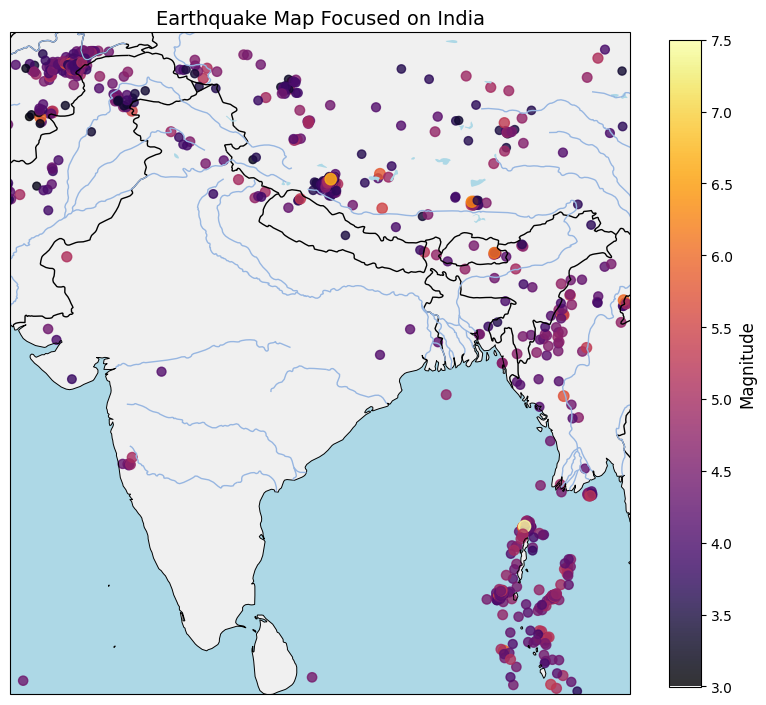

In [9]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature


df_limited = df.head(1000)

# create figure
plt.figure(figsize=(10, 12))


ax = plt.axes(projection=ccrs.PlateCarree())

# set map extent to India region (min lon, max lon, min lat, max lat)
ax.set_extent([68, 98, 6, 38], crs=ccrs.PlateCarree())

# add map features
ax.add_feature(cfeature.BORDERS, linewidth=1)
ax.add_feature(cfeature.COASTLINE, linewidth=0.7)
ax.add_feature(cfeature.LAND, facecolor="#f0f0f0")
ax.add_feature(cfeature.LAKES, facecolor="lightblue")
ax.add_feature(cfeature.OCEAN, facecolor="lightblue")
ax.add_feature(cfeature.RIVERS)

# plot earthquake points
sc = plt.scatter(
    df_limited['longitude'],
    df_limited['latitude'],
    c=df_limited['mag'],
    cmap='inferno',
    s=df_limited['mag'] * 10,   # scale marker size
    alpha=0.8,
    transform=ccrs.PlateCarree()
)

# colorbar
cbar = plt.colorbar(sc, orientation='vertical', shrink=0.7)
cbar.set_label("Magnitude", fontsize=12)

plt.title("Earthquake Map Focused on India", fontsize=14)
plt.show()


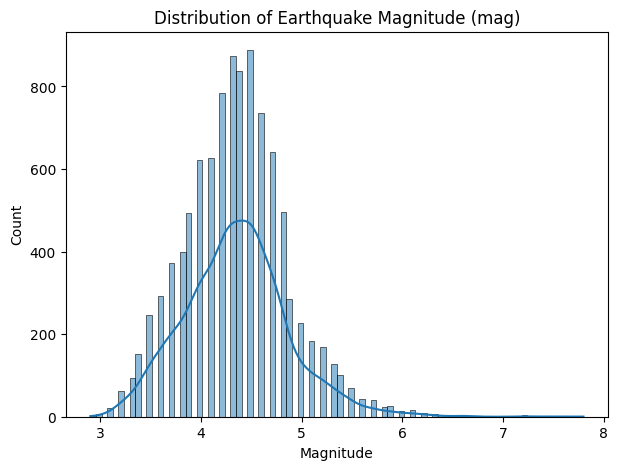

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(7,5))
sns.histplot(df['mag'].dropna(), kde=True)
plt.title('Distribution of Earthquake Magnitude (mag)')
plt.xlabel('Magnitude')
plt.ylabel('Count')
plt.show()


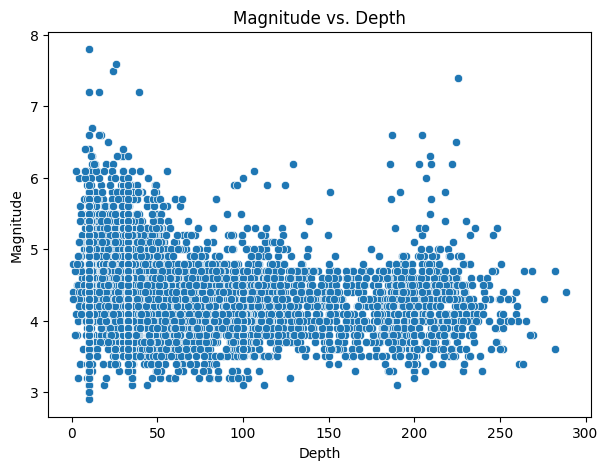

In [11]:
plt.figure(figsize=(7,5))
sns.scatterplot(x='depth', y='mag', data=df)
plt.title('Magnitude vs. Depth')
plt.xlabel('Depth')
plt.ylabel('Magnitude')
plt.show()


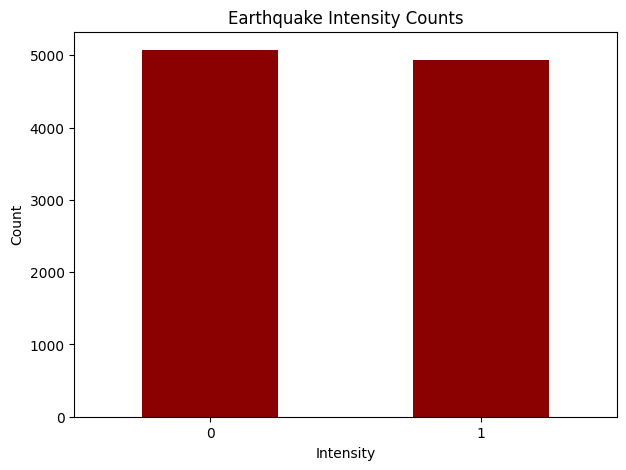

In [12]:
plt.figure(figsize=(7,5))
intensity_counts = df['Earthquake Intensity'].astype(str).value_counts().sort_index()
intensity_counts.plot(kind='bar', rot=0, color='darkred')
plt.title('Earthquake Intensity Counts')
plt.xlabel('Intensity')
plt.ylabel('Count')
plt.show()


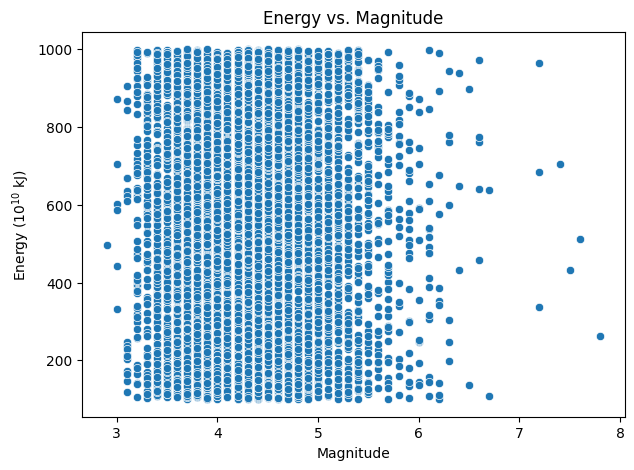

In [13]:
plt.figure(figsize=(7,5))
sns.scatterplot(x='mag', y='Energy(10¹⁰ kJ)', data=df)
plt.title('Energy vs. Magnitude')
plt.xlabel('Magnitude')
plt.ylabel('Energy ($10^{10}$ kJ)')
plt.show()


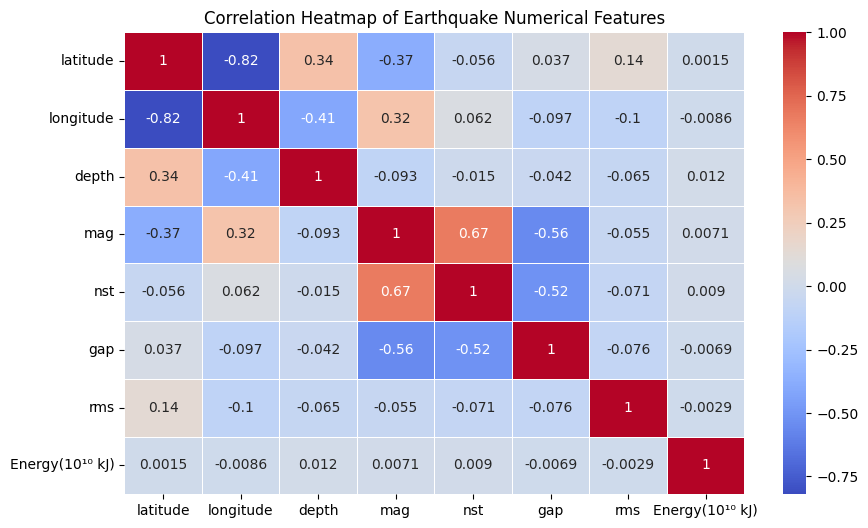

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
numeric_cols = ['latitude', 'longitude', 'depth', 'mag', 'nst', 'gap','rms', 'Energy(10¹⁰ kJ)']
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap="coolwarm", linewidths=.5)
plt.title("Correlation Heatmap of Earthquake Numerical Features")
plt.show()


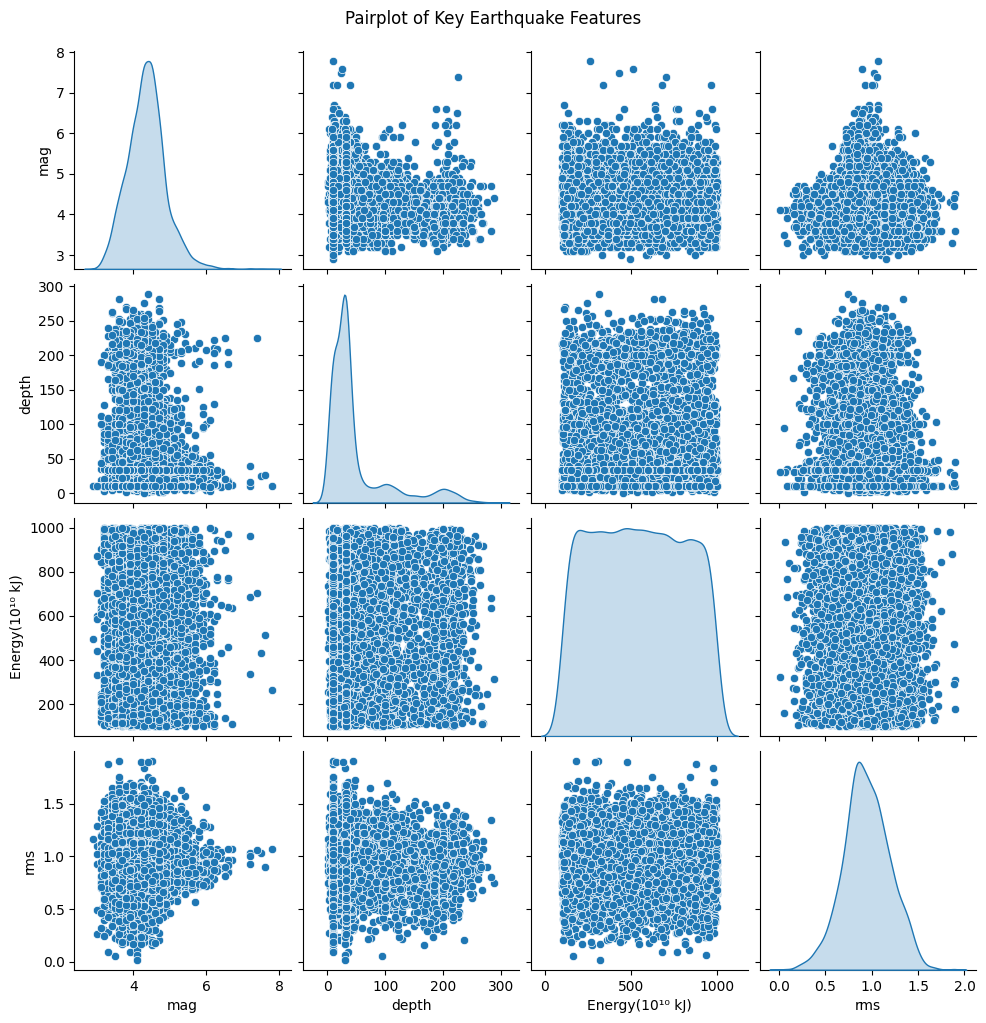

In [15]:
sns.pairplot(df[['mag', 'depth', 'Energy(10¹⁰ kJ)', 'rms']], diag_kind='kde')
plt.suptitle("Pairplot of Key Earthquake Features", y=1.02)
plt.show()

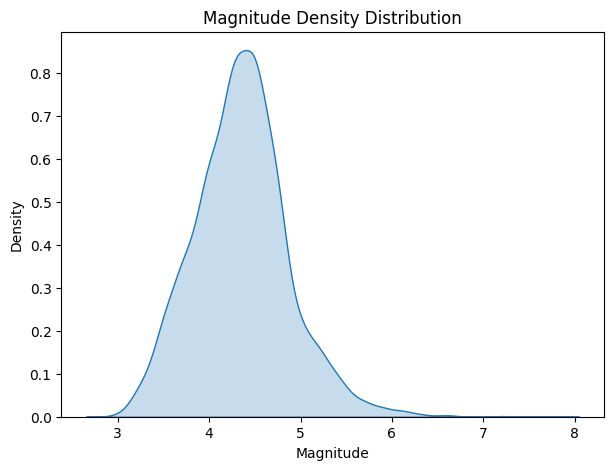

In [16]:
plt.figure(figsize=(7,5))
sns.kdeplot(df['mag'], fill=True)
plt.title('Magnitude Density Distribution')
plt.xlabel('Magnitude')
plt.ylabel('Density')
plt.show()


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from xgboost import XGBClassifier, plot_importance
import matplotlib.pyplot as plt


selected_features = [
    'depth', 'mag', 'magType', 'nst', 'gap', 'dmin',
    'rms', 'Alert Level', 'seismic_wave', 'Energy(10¹⁰ kJ)'
]

X = df[selected_features]
y = df['Earthquake Intensity']     # target


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


model = XGBClassifier(
    n_estimators=400,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.9,
    colsample_bytree=0.9,
    random_state=42,
    eval_metric='mlogloss'
)

model.fit(X_train, y_train)


y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))



Accuracy: 0.959

Classification Report:

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1011
           1       0.96      0.96      0.96       989

    accuracy                           0.96      2000
   macro avg       0.96      0.96      0.96      2000
weighted avg       0.96      0.96      0.96      2000



In [18]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report
from xgboost import XGBClassifier
from scipy.stats import randint, uniform
import matplotlib.pyplot as plt


selected_features = [
    'depth', 'mag', 'magType', 'nst', 'gap', 'dmin',
    'rms', 'Alert Level', 'seismic_wave', 'Energy(10¹⁰ kJ)'
]

X = df[selected_features]
y = df['Earthquake Intensity']       # target variable



# Train set: used to train the model
# Test set: used to evaluate final accuracy on unseen data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)



param_dist = {
    'n_estimators': randint(200, 600),          # number of trees
    'max_depth': randint(3, 10),                # depth of each tree
    'learning_rate': uniform(0.01, 0.2),        # how fast model learns
    'subsample': uniform(0.7, 0.3),             # sample % of rows
    'colsample_bytree': uniform(0.7, 0.3),      # sample % of columns
    'gamma': uniform(0, 5),                     # minimum loss reduction
    'min_child_weight': randint(1, 8)           # minimum leaf weight
}



# RandomizedSearch performs search on a random sample of parameters
# CV = 3 means dataset is split into 3 validation folds
# ✔ Each fold acts as VALIDATION SET
# ✔ Helps avoid overfitting
xgb_base = XGBClassifier(
    eval_metric='mlogloss',
    random_state=42
)

random_search = RandomizedSearchCV(
    estimator=xgb_base,
    param_distributions=param_dist,
    n_iter=20,              # number of combinations to try
    scoring='accuracy',
    cv=3,                   # 3-fold CROSS-VALIDATION
    verbose=2,
    n_jobs=-1
)

random_search.fit(X_train, y_train)

print("Best Parameters:")
print(random_search.best_params_)


best_model = random_search.best_estimator_

best_model.fit(X_train, y_train)


y_pred = best_model.predict(X_test)

print("Final Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best Parameters:
{'colsample_bytree': np.float64(0.9019146803944866), 'gamma': np.float64(3.7503566414087426), 'learning_rate': np.float64(0.08716112974450604), 'max_depth': 3, 'min_child_weight': 5, 'n_estimators': 472, 'subsample': np.float64(0.9656918677889237)}
Final Accuracy: 0.959

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1011
           1       0.96      0.96      0.96       989

    accuracy                           0.96      2000
   macro avg       0.96      0.96      0.96      2000
weighted avg       0.96      0.96      0.96      2000



In [19]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# -----------------------------------------------------------
#  Select required columns
# -----------------------------------------------------------
selected_features = [
    'depth', 'mag', 'magType', 'nst', 'gap', 'dmin',
    'rms', 'Alert Level', 'seismic_wave', 'Energy(10¹⁰ kJ)'
]

X = df[selected_features]
y = df['Earthquake Intensity']


# -----------------------------------------------------------
#  Split into Train and Test
# -----------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


# -----------------------------------------------------------
#  Hyperparameter tuned
# -----------------------------------------------------------
svm_model = SVC(kernel='rbf')

svm_model.fit(X_train, y_train)


# -----------------------------------------------------------
#  Predictions and Evaluation
# -----------------------------------------------------------
y_pred = svm_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.958

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1011
           1       0.96      0.96      0.96       989

    accuracy                           0.96      2000
   macro avg       0.96      0.96      0.96      2000
weighted avg       0.96      0.96      0.96      2000



In [24]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# -----------------------------------------------------------
#  Select required columns
# -----------------------------------------------------------
selected_features = [
    'depth', 'mag', 'magType', 'nst', 'gap', 'dmin',
    'rms', 'Alert Level', 'seismic_wave', 'Energy(10¹⁰ kJ)'
]

X = df[selected_features]
y = df['Earthquake Intensity']

# -----------------------------------------------------------
#  Train-Test Split
# -----------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# -----------------------------------------------------------
#  Feedforward Neural Network (FNN) - 200 epochs
# -----------------------------------------------------------
fnn = MLPClassifier(
    hidden_layer_sizes=(64, 32),  # two hidden layers
    activation='relu',
    solver='adam',
    max_iter=200,                 # 200 epochs
    random_state=42,
    verbose=True                  # display training progress
)

fnn.fit(X_train, y_train)

# -----------------------------------------------------------
#  Evaluation
# -----------------------------------------------------------
y_pred = fnn.predict(X_test)

print("FNN Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Iteration 1, loss = 1.30623927
Iteration 2, loss = 0.36847430
Iteration 3, loss = 0.32838507
Iteration 4, loss = 0.32303838
Iteration 5, loss = 0.32336344
Iteration 6, loss = 0.31521227
Iteration 7, loss = 0.30111642
Iteration 8, loss = 0.30263398
Iteration 9, loss = 0.28460712
Iteration 10, loss = 0.28190519
Iteration 11, loss = 0.28603312
Iteration 12, loss = 0.28453435
Iteration 13, loss = 0.28614108
Iteration 14, loss = 0.32900858
Iteration 15, loss = 0.29207631
Iteration 16, loss = 0.28038951
Iteration 17, loss = 0.28009780
Iteration 18, loss = 0.26992237
Iteration 19, loss = 0.26902436
Iteration 20, loss = 0.27135842
Iteration 21, loss = 0.26159809
Iteration 22, loss = 0.29109051
Iteration 23, loss = 0.27967562
Iteration 24, loss = 0.28988909
Iteration 25, loss = 0.26336693
Iteration 26, loss = 0.27889817
Iteration 27, loss = 0.27069080
Iteration 28, loss = 0.26246371
Iteration 29, loss = 0.28343208
Iteration 30, loss = 0.26296750
Iteration 31, loss = 0.25899664
Iteration 32, los

In [25]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report
from scipy.stats import randint, uniform

# -----------------------------------------------------------
# Select columns
# -----------------------------------------------------------
selected_features = [
    'depth', 'mag', 'magType', 'nst', 'gap', 'dmin',
    'rms', 'Alert Level', 'seismic_wave', 'Energy(10¹⁰ kJ)'
]

X = df[selected_features]
y = df['Earthquake Intensity']


# -----------------------------------------------------------
#  Train-Test Split
# -----------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


# -----------------------------------------------------------
#  Define Base FNN Model
# -----------------------------------------------------------
base_fnn = MLPClassifier(
    max_iter=400,
    random_state=42
)


# -----------------------------------------------------------
#  Hyperparameter Search Space
# -----------------------------------------------------------
param_dist = {
    'hidden_layer_sizes': [(32,), (64,), (128,), (64, 32), (128, 64)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'learning_rate_init': uniform(0.0005, 0.02),
    'alpha': uniform(0.0001, 0.01),
}

# Validation occurs here → cv=3 means 3-fold cross-validation
random_search = RandomizedSearchCV(
    estimator=base_fnn,
    param_distributions=param_dist,
    n_iter=15,
    scoring='accuracy',
    cv=3,
    verbose=2,
    n_jobs=-1
)

random_search.fit(X_train, y_train)

print("Best Parameters Found:")
print(random_search.best_params_)


# -----------------------------------------------------------
#  Train FNN with Best Parameters
# -----------------------------------------------------------
best_fnn = random_search.best_estimator_
best_fnn.fit(X_train, y_train)


# -----------------------------------------------------------
# Evaluate Tuned FNN
# -----------------------------------------------------------
y_pred = best_fnn.predict(X_test)

print("FNN Accuracy (With Tuning):", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Fitting 3 folds for each of 15 candidates, totalling 45 fits
Best Parameters Found:
{'activation': 'tanh', 'alpha': np.float64(0.004428117861098567), 'hidden_layer_sizes': (64,), 'learning_rate_init': np.float64(0.019188371711507116), 'solver': 'adam'}
FNN Accuracy (With Tuning): 0.9285

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.91      0.93      1011
           1       0.92      0.94      0.93       989

    accuracy                           0.93      2000
   macro avg       0.93      0.93      0.93      2000
weighted avg       0.93      0.93      0.93      2000



In [28]:
import pandas as pd

# Overall metrics for each model
xgb_metrics = {'Accuracy': 0.959, 'Precision': 0.96, 'Recall': 0.96, 'F1-Score': 0.96}
svm_metrics = {'Accuracy': 0.958, 'Precision': 0.96, 'Recall': 0.96, 'F1-Score': 0.96}
fnn_metrics = {'Accuracy': 0.9285, 'Precision': 0.93, 'Recall': 0.925, 'F1-Score': 0.93}

# Combine into a list of dictionaries
model_comparisons = [
    {'Model': 'XGBoost', **xgb_metrics},
    {'Model': 'SVM', **svm_metrics},
    {'Model': 'FNN', **fnn_metrics},
]


comparison_df = pd.DataFrame(model_comparisons)


print(comparison_df.to_markdown(index=False, numalign="left", stralign="left"))


| Model   | Accuracy   | Precision   | Recall   | F1-Score   |
|:--------|:-----------|:------------|:---------|:-----------|
| XGBoost | 0.959      | 0.96        | 0.96     | 0.96       |
| SVM     | 0.958      | 0.96        | 0.96     | 0.96       |
| FNN     | 0.9285     | 0.93        | 0.925    | 0.93       |
